# 사이킷런
## 개요

In [59]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [61]:
import pandas as pd

iris = load_iris()

iris_data = iris.data

iris_label = iris.target
print('iris target값 : ', iris_label)
print('iris target명 :', iris.target_names)

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값 :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명 : ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [62]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,
                                                   test_size=0.2, random_state=11)

In [65]:
dt_clf = DecisionTreeClassifier(random_state=11)

In [66]:
# 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [67]:
# 예측
pred = dt_clf.predict(X_test)

In [68]:
# 평가
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


연습

In [72]:
# 테스트 데이터세트를 전체의 30%로 쪼개보기
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.3, random_state=121)

In [74]:
# 학습
dt_clf.fit(X_train, y_train)
# 예측
pred = dt_clf.predict(X_test)
# 평가
print(accuracy_score(y_test, pred))

0.9555555555555556


## 교차검증
### KFold 교차검증

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=151)

kfold = KFold(n_splits=5)
cv_accuracy=[]
print('붗꽃 데이터 세트 크기:', features.shape[0])

붗꽃 데이터 세트 크기: 150


In [77]:
n_iter = 0

# KFold 객체의 split() : 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
         .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도 평균 
print('\n##평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

##평균 검증 정확도: 0.91334


### Stratified K 폴드
: 불균형한 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식

In [78]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [81]:
# kfold는 교차검증 세트마다 레이블 분포가 다를 수 있다. 
# Stratified는 분류에서만 쓰인다.
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(features, label):
    X_train = features[train_index]
    X_test = features[test_index]
    y_train = label[train_index]
    y_test = label[test_index]
    
    #print('학습 레이블 데이터 분포 : \n', y_train.value_counts())
    #print('검증 레이블 데이터 분포 : \n', y_test.value_counts())
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    
    n_iter += 1
    print('{0} 번째 폴드 정확성 : {1}'.format(n_iter, accuracy))

1 번째 폴드 정확성 : 0.98
2 번째 폴드 정확성 : 0.94
3 번째 폴드 정확성 : 1.0


### 교차 검증을 보다 간편하게 - cross_val_score()

In [82]:
# kfold에서 폴드 세트 설정, 루프 반복으로 인덱스 추출, 반복적으로 학습 및 예측수행을 한큐에
# cross_val_score는 내부적으로 StratifiedKFold 사용
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도, 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


### GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에

In [83]:
# 수행시간이 오래걸린다는 단점
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                   test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()

parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2, 3]}


In [84]:
import pandas as pd

grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

grid_dtree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
          'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [85]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


In [87]:
# GridSearchCV 의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667


## 데이터 전처리

모든 문자열 값은 인코딩돼서 숫자 형으로 변환해야 함. 
<br>레이블 인코딩 : 카테고리 피처를 코드형 숫자값으로 변환

In [88]:
from sklearn.preprocessing import LabelEncoder

items=['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)
# 주의 : 레이블인코딩은 선형회귀같은 알고리즘엔 사용 불가. 숫자이기때문에 숫자크기의 차이가 영향 미칠수있음.
# 분류에서만 사용 가능 

인코딩 변환값: [0 1 4 5 3 3 2 2]


원-핫 인코딩 : 행 형태로 돼 있는 피처의 고유 값을 열 형태로 차원 변환 후, 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0 표시<br>
<br>** 주의 : 
- OneHotEncoder로 변환 전 모든 문자열 값이 숫자형 값으로 변환되야함.
- 입력값으로 2차원 데이터가 필요함

In [92]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 숫자값으로 변환 위해 LabelEncoder 로 변환
lEncoder = LabelEncoder()
lEncoder.fit(items)
labels = lEncoder.transform(items)
labels = labels.reshape(-1, 1) # 2차원 데이터로 변환

ohEncoder = OneHotEncoder()
ohEncoder.fit(labels)
oh_labels = ohEncoder.transform(labels)
print(oh_labels.toarray())

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [93]:
# get_dummies() : 원-핫 인코딩을 더 쉽게
import pandas as pd

df = pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


## 피처 스케일링과 정규화
### StandardScaler
표준화 지원. 개별 피처를 평균이 0이고 분산이 1인 값으로 변환<br>
서포트벡터머신, 선형회귀, 로지스틱회귀 전 단계로 필요

In [94]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print(iris_df.mean())
print(iris_df.var())

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print(iris_df_scaled.mean())
print(iris_df_scaled.var())

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### MinMaxScaler
데이터값을 0과 1사이의 범위값으로 변환

In [97]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df) # ndarray로 반환

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print(iris_df_scaled.min())
print(iris_df_scaled.max())

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 사이킷런으로 수행하는 타이타닉 생존자 예측

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv(r'/Users/linakim/Downloads/titanic/train.csv')

In [99]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [100]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [101]:
# 결측값 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df.fillna('N', inplace=True)

In [102]:
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [103]:
# 문자열피처 값 분류 살펴보기
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [104]:
titanic_df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
347088      6
3101295     6
           ..
PC 17590    1
349254      1
350407      1
28551       1
234604      1
Name: Ticket, Length: 681, dtype: int64

In [105]:
titanic_df['Cabin'].value_counts()

N              687
C23 C25 C27      4
B96 B98          4
G6               4
E101             3
              ... 
E34              1
D7               1
A36              1
C49              1
E31              1
Name: Cabin, Length: 148, dtype: int64

In [106]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [107]:
# Cabin 변수의 경우 맨 앞 알파벳이 등급을 나타내므로 중요 
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].head(3)

0    N
1    C
2    N
Name: Cabin, dtype: object

In [110]:
# 성별에 따라 생존자가 얼마나 차이나는지 보자.
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

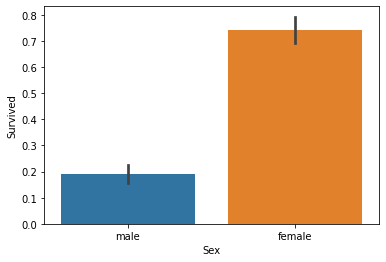

In [111]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

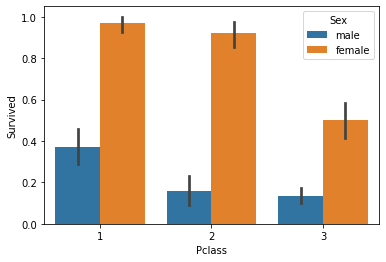

In [112]:
# 객실 등급별 성별에 때른 생존 확률
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

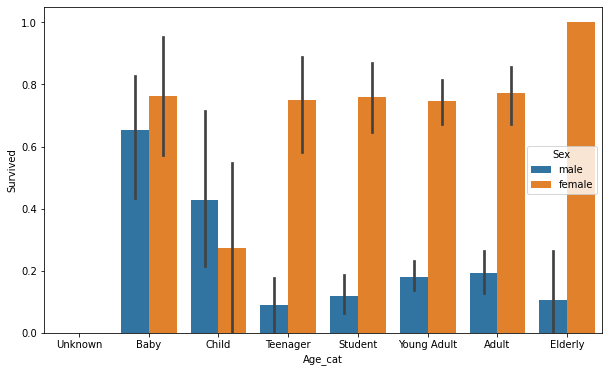

In [114]:
# 연령에 따른 생존 확률
def get_category(age):
    cat = ''
    if(age <= -1): cat = 'Unknown'
    elif(age <= 5): cat = 'Baby'
    elif(age <= 12): cat = 'Child'
    elif(age <= 18): cat = 'Teenager'
    elif(age <= 25): cat = 'Student'
    elif(age <= 35): cat = 'Young Adult'
    elif(age <= 60): cat = 'Adult'
    else : cat = 'Elderly' 
        
    return cat

plt.figure(figsize=(10, 6))
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [115]:
# 남아있는 문자열 칼럼 숫자형으로 변환
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        encoder = preprocessing.LabelEncoder()
        encoder.fit(dataDF[feature])
        dataDF[feature] = encoder.transform(dataDF[feature])
    
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [125]:
# 데이터 전처리 함수화
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        encoder = preprocessing.LabelEncoder()
        encoder.fit(df[feature])
        df[feature] = encoder.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    fillna(df)
    drop_features(df)
    format_features(df)
    return df

In [126]:
# 다시 원본가지고 피처와 레이블 분리
titanic_df = pd.read_csv(r'/Users/linakim/Downloads/titanic/train.csv')

label = titanic_df['Survived']
titanic_df.drop(['Survived'], axis=1, inplace=True)
feature = transform_features(titanic_df)


In [127]:
X_train, X_test, y_train, y_test = train_test_split(feature, label, 
                                                    test_size=0.2, random_state=111)

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, 랜덤포레스트, 로지스틱회귀를 위한 사이킷런 Classifier 객체 생성
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('Decision Tree accuracy : ', np.round(accuracy_score(y_test, pred), 4))

# RandomForest 학습/예측/평가
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print('Random Forest accuracy :' , np.round(accuracy_score(y_test, pred), 4))

# 로지스틱회귀 학습/예측/평가
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
print('Logistic Regression accuracy :', np.round(accuracy_score(y_test, pred), 4))

Decision Tree accuracy :  0.7374
Random Forest accuracy : 0.8492
Logistic Regression accuracy : 0.7877


/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [131]:
# 교차검증 
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_clf, feature, label, scoring='accuracy', cv=5)
for iter_count, accuracy in enumerate(scores):
    print('{0} 폴드 정확성 : {1:.4f}'.format(iter_count, accuracy))

print('평균 정확도 :{0:.4f}'.format(np.mean(scores)))

0 폴드 정확성 : 0.7989
1 폴드 정확성 : 0.7697
2 폴드 정확성 : 0.7809
3 폴드 정확성 : 0.7753
4 폴드 정확성 : 0.7978
평균 정확도 :0.7845


/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [136]:
# gridsearchCV로 하이퍼파라미터까지 맞추며 교차검증
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],
             'min_samples_split':[2, 3, 5],
             'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, cv=5, refit=True)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 :', grid_dclf.best_score_)
best_dclf = grid_dclf.best_estimator_

# 최적 하이퍼파라미터로 학습된 Estimator로 예측 및 평가 수행(이미 학습되어 학습필요없음)
pred = best_dclf.predict(X_test)
print('테스트세트에서의 DecisionTreeClassifier 정확도 :{0:.4f}'.format(accuracy_score(pred, y_test)))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.8174431202600217
테스트세트에서의 DecisionTreeClassifier 정확도 :0.7933
